## 1b: Re-creating pie-chart

In [1]:
# import relevant libraries.
import pandas as pd
import numpy as np
from datetime import date
from matplotlib import pyplot as plt

In [2]:
# read data into pandas dataframe
df = pd.read_csv("TMA_Data.csv")

In [3]:
# creating summary table by counting the number of employees that met their respective performance
performance_table = df.groupby(['PerformanceScore'])['PerformanceScore'].count()

# creating a dataframe for performance_table
performance_table = pd.DataFrame(performance_table)

# renaming PerformanceScore to Employee Count to replicate Excel's table output
performance_table.rename(columns = {'PerformanceScore' : 'Employee Count'}, inplace=True)

# resetting index of performance_table
performance_table = performance_table.reset_index()

# corresponding summarized table for pie chart
display(performance_table)

,PerformanceScore,Employee Count
0,Exceed,30
1,Meet,201
2,PIP,2
3,To Improve,17


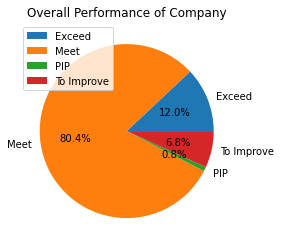

In [4]:
# creating pie chart using the summary table
performance_table.groupby(['PerformanceScore']).sum().plot(kind='pie', title='Overall Performance of Company', y='Employee Count', autopct='%1.1f%%')
plt.ylabel('') # removing ylabel from pie chart output
plt.show()

## 1b: Re-creating bar chart

In [5]:
# creating summary table by grouping the average salary of employees by unit
avg_unit_salary = df.groupby(['Unit'])['Salary'].mean()

# creating a dataframe for avg_unit_salary
avg_unit_salary = pd.DataFrame(avg_unit_salary)

# removing the only C-level unit from the data because there is only one employee in that unit
avg_unit_salary = avg_unit_salary.drop('C-Level')

# resetting index of avg_unit_salary
avg_unit_salary = avg_unit_salary.reset_index()

In [6]:
# creating lists with average salary values of each citizenship status
unit_list = ['Admin ', 'Engineering', 'IT', 'Manufacturing', 'Sales']
citizen_list = [79701.17, 97033.00, 93964.23, 59883.29, 71502.32]
non_resident_list = [0, 100416.00, 94490.40, 58696.10, 0]
PR_list = [63000.00, 89511.50, 104367.00, 57178.36, 70947.00]

# creating a dataframe for avg_citizen_salary
avg_citizen_salary_df = pd.DataFrame({'Unit':unit_list, 'Citizen':citizen_list, 'Non-Resident':non_resident_list, 'PR':PR_list})

In [7]:
# merging both dataframes, avg_unit_salary and avg_citizen_salary, into one dataframe before plotting bar graph
after_merging = avg_unit_salary.merge(avg_citizen_salary_df)
after_merging.rename(columns = {'Salary':'Average Salary'}, inplace = True)

# corresponding summarized table for bar chart
display(after_merging)

,Unit,Average Salary,Citizen,Non-Resident,PR
0,Admin,77315.285714,79701.17,0.0,63000.00
1,Engineering,95867.000000,97033.00,100416.0,89511.50
2,IT,95550.756098,93964.23,94490.4,104367.00
3,Manufacturing,59412.905325,59883.29,58696.1,57178.36
4,Sales,71426.590909,71502.32,0.0,70947.00


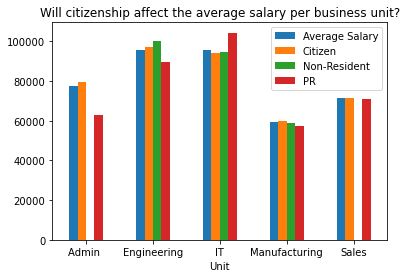

In [8]:
# plotting bar chart
after_merging.plot(x='Unit', kind='bar', stacked=False, title='Will citizenship affect the average salary per business unit?')

# rotate x-axis labels vertically
plt.xticks(rotation = 0)
plt.show()

## 1c: Length of service of all the staff

In [9]:
# converting JoinDate column to datetime object to perform arithmetic operations
df['JoinDate'] = pd.to_datetime(df['JoinDate'])

# converting LeftDate column to datetime objects to perform arithmetic operations
df['LeftDate'] = pd.to_datetime(df['LeftDate'])

# replacing the missing values of LeftDate for staff who has not left the organisation using the date provided, 1st May 2022.
df['LeftDate'].fillna(value = "5/1/2022", inplace = True)

In [10]:
# finding the length of service of all the staff in days
df['Difference in years'] = df['LeftDate'] - df['JoinDate']

# finding the length of service of all the staff in years
df['Difference in years'] = ((df['Difference in years']).dt.days / 365)
service_in_years = df['Difference in years']
service_in_years = pd.DataFrame(service_in_years)

In [11]:
# finding the minimum length of service in years
min_service = float(df['Difference in years'].min())
print("The minimum length of service is " + str("%.1f" % min_service) + " years.")

The minimum length of service is 0.1 years.


In [12]:
# finding the maximum length of service in years
max_service = float(df['Difference in years'].max())
print("The maximum length of service is " + str("%.1f" % max_service) + " years.")

The maximum length of service is 16.3 years.


In [13]:
# finding the average length of service in years
mean_service = float(df['Difference in years'].mean())
print("The average length of service is " + str("%.1f" % mean_service) + " years.")

The average length of service is 6.8 years.


## 1d: Interactive user input

In [ ]:
print("This program checks if a particular person was/is a staff of the organization.")

conditional_date = pd.Timestamp(year=2022, month=5, day=1, hour=0) # setting conditional date to 1st May 2022
status = True # status is the break condition for the while-loop

while status == True:
    try:
        name_entry = input("Please enter the person's full name: ")
        Name_Entry = name_entry.title() # capitalize the first character in every word
            
        check_person = df.loc[df.Staff == Name_Entry] # checking if the name entered exists in the organization's records
        join_date = check_person.values[0,7]
        left_date = check_person.values[0,8]
        
        if left_date == conditional_date:
            joindate = join_date.strftime('%d %B %Y.') # changing the date format to (day of the month, month's full name, full year) to be read easily
            print(f"{Name_Entry} is currently a staff of the organization, and has been a staff since {joindate}")
            
        else:
            leftdate = left_date.strftime("%d %B %Y.") # changing the date format to (day of the month, month's full name, full year) to be read easily
            print(f"{Name_Entry} was a staff of the organization, and has left the organization since {leftdate}")
                
        while True: 
            go_again = input("Would you like to enter another person's name (yes/no): ") # allowing the user to choose to enter another person's name
            if go_again == 'yes':
                break # break out of this while-loop to start from name_entry

            elif go_again == 'no':
                status = False # setting status to False would indicate that the bigger while-loop would not execute
                print('Stopping program.')            
                break # break out of this while-loop to end the program

            else:
                print('Invalid input, please enter yes or no.')
                continue # continue this while-loop if the input for go_again is neither 'yes' or 'no'
        
    except IndexError:
        print(f"The name {Name_Entry} is not in the organization's records.")
        


This program checks if a particular person was/is a staff of the organization.
Please enter the person's full name: 
The name  is not in the organization's records.
Please enter the person's full name: 
The name  is not in the organization's records.
